# <p style = "font-size : 50px; color : #000000 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ff0000; border-radius: 5px 5px;"><strong>🍷 Red Wine Quality Analysis</strong></p>

Con el siguiente conjuntos de datos aplicaremos Algoritmos de clasificación o regresión. Las clases están ordenadas y no equilibradas (por ejemplo, hay vinos buenos o malos).

# Importing Libraries 

In [24]:

# For Data Manipulation
import pandas as pd
import numpy as np
import sklearn as s
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from itertools import cycle

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB


# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier 

# Red neuronal
from tensorflow import keras
from tensorflow.keras import layers

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier as KNN

# For Classification Results
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.exceptions import NotFittedError
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, log_loss

#Bibliotecas para generar gráficos
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore")


from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

# Loading the dataset

In [3]:
wine = pd.read_csv('./winequality-red.csv')

<a id = '3.1'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Variable Description</strong></p>


<ol>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>fixed acidity : </strong> most acids involved with wine or fixed or nonvolatile (do not evaporate readily) </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>volatile acidity : </strong>the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>citric acid : </strong> found in small quantities, citric acid can add 'freshness' and flavor to wines</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>residual sugar : </strong>the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>chlorides : </strong> the amount of salt in the wine</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>free sulfur dioxide : </strong> the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>total sulfur dioxide : </strong> amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine</p> </li>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>density : </strong>the density of water is close to that of water depending on the percent alcohol and sugar content </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>ph : </strong>  describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>sulphates : </strong> a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>alcohol sulfur dioxide : </strong> the percent alcohol content of the wine </p> </li>
            <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>quality : </strong> output variable (based on sensory data, score between 0 and 10)</p> </li>

![giphy.gif](https://media.giphy.com/media/ng6NcNAvohN6M/giphy.gif)

# Exploratory Data Analysis (EDA)

In [4]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Visualization Data Analysis

El gráfico anterior muestra que las etiquetas de salida no se distribuyen uniformemente. Por lo tanto, tenemos que realizar un muestreo en la entrada, al que llegaremos después de ver cómo los datos esta distribuido

<Figure size 432x288 with 0 Axes>

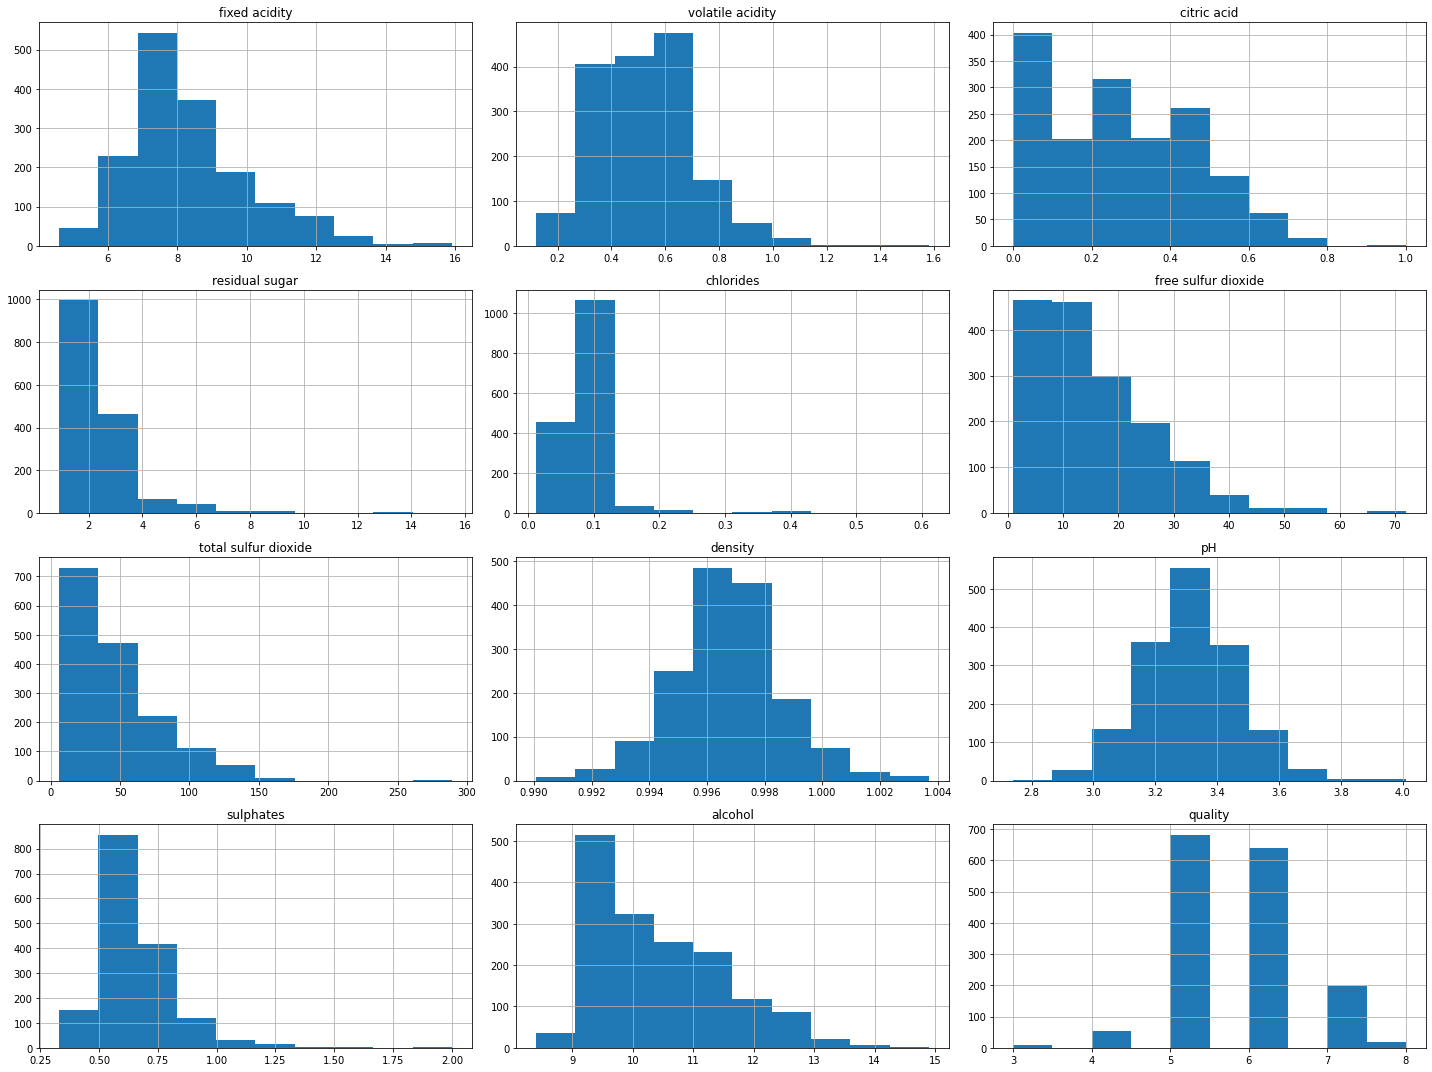

In [ ]:
plt.figure()
wine.hist(figsize=(20,15))
plt.tight_layout()

Parece que el conjunto de datos no tiene valores nulos en ninguna de las características, etiquetas. Descubramos ahora las correlaciones entre las características y las etiquetas.

Aca se pueden ver las correlaciones entre las variables en forma de grafica.

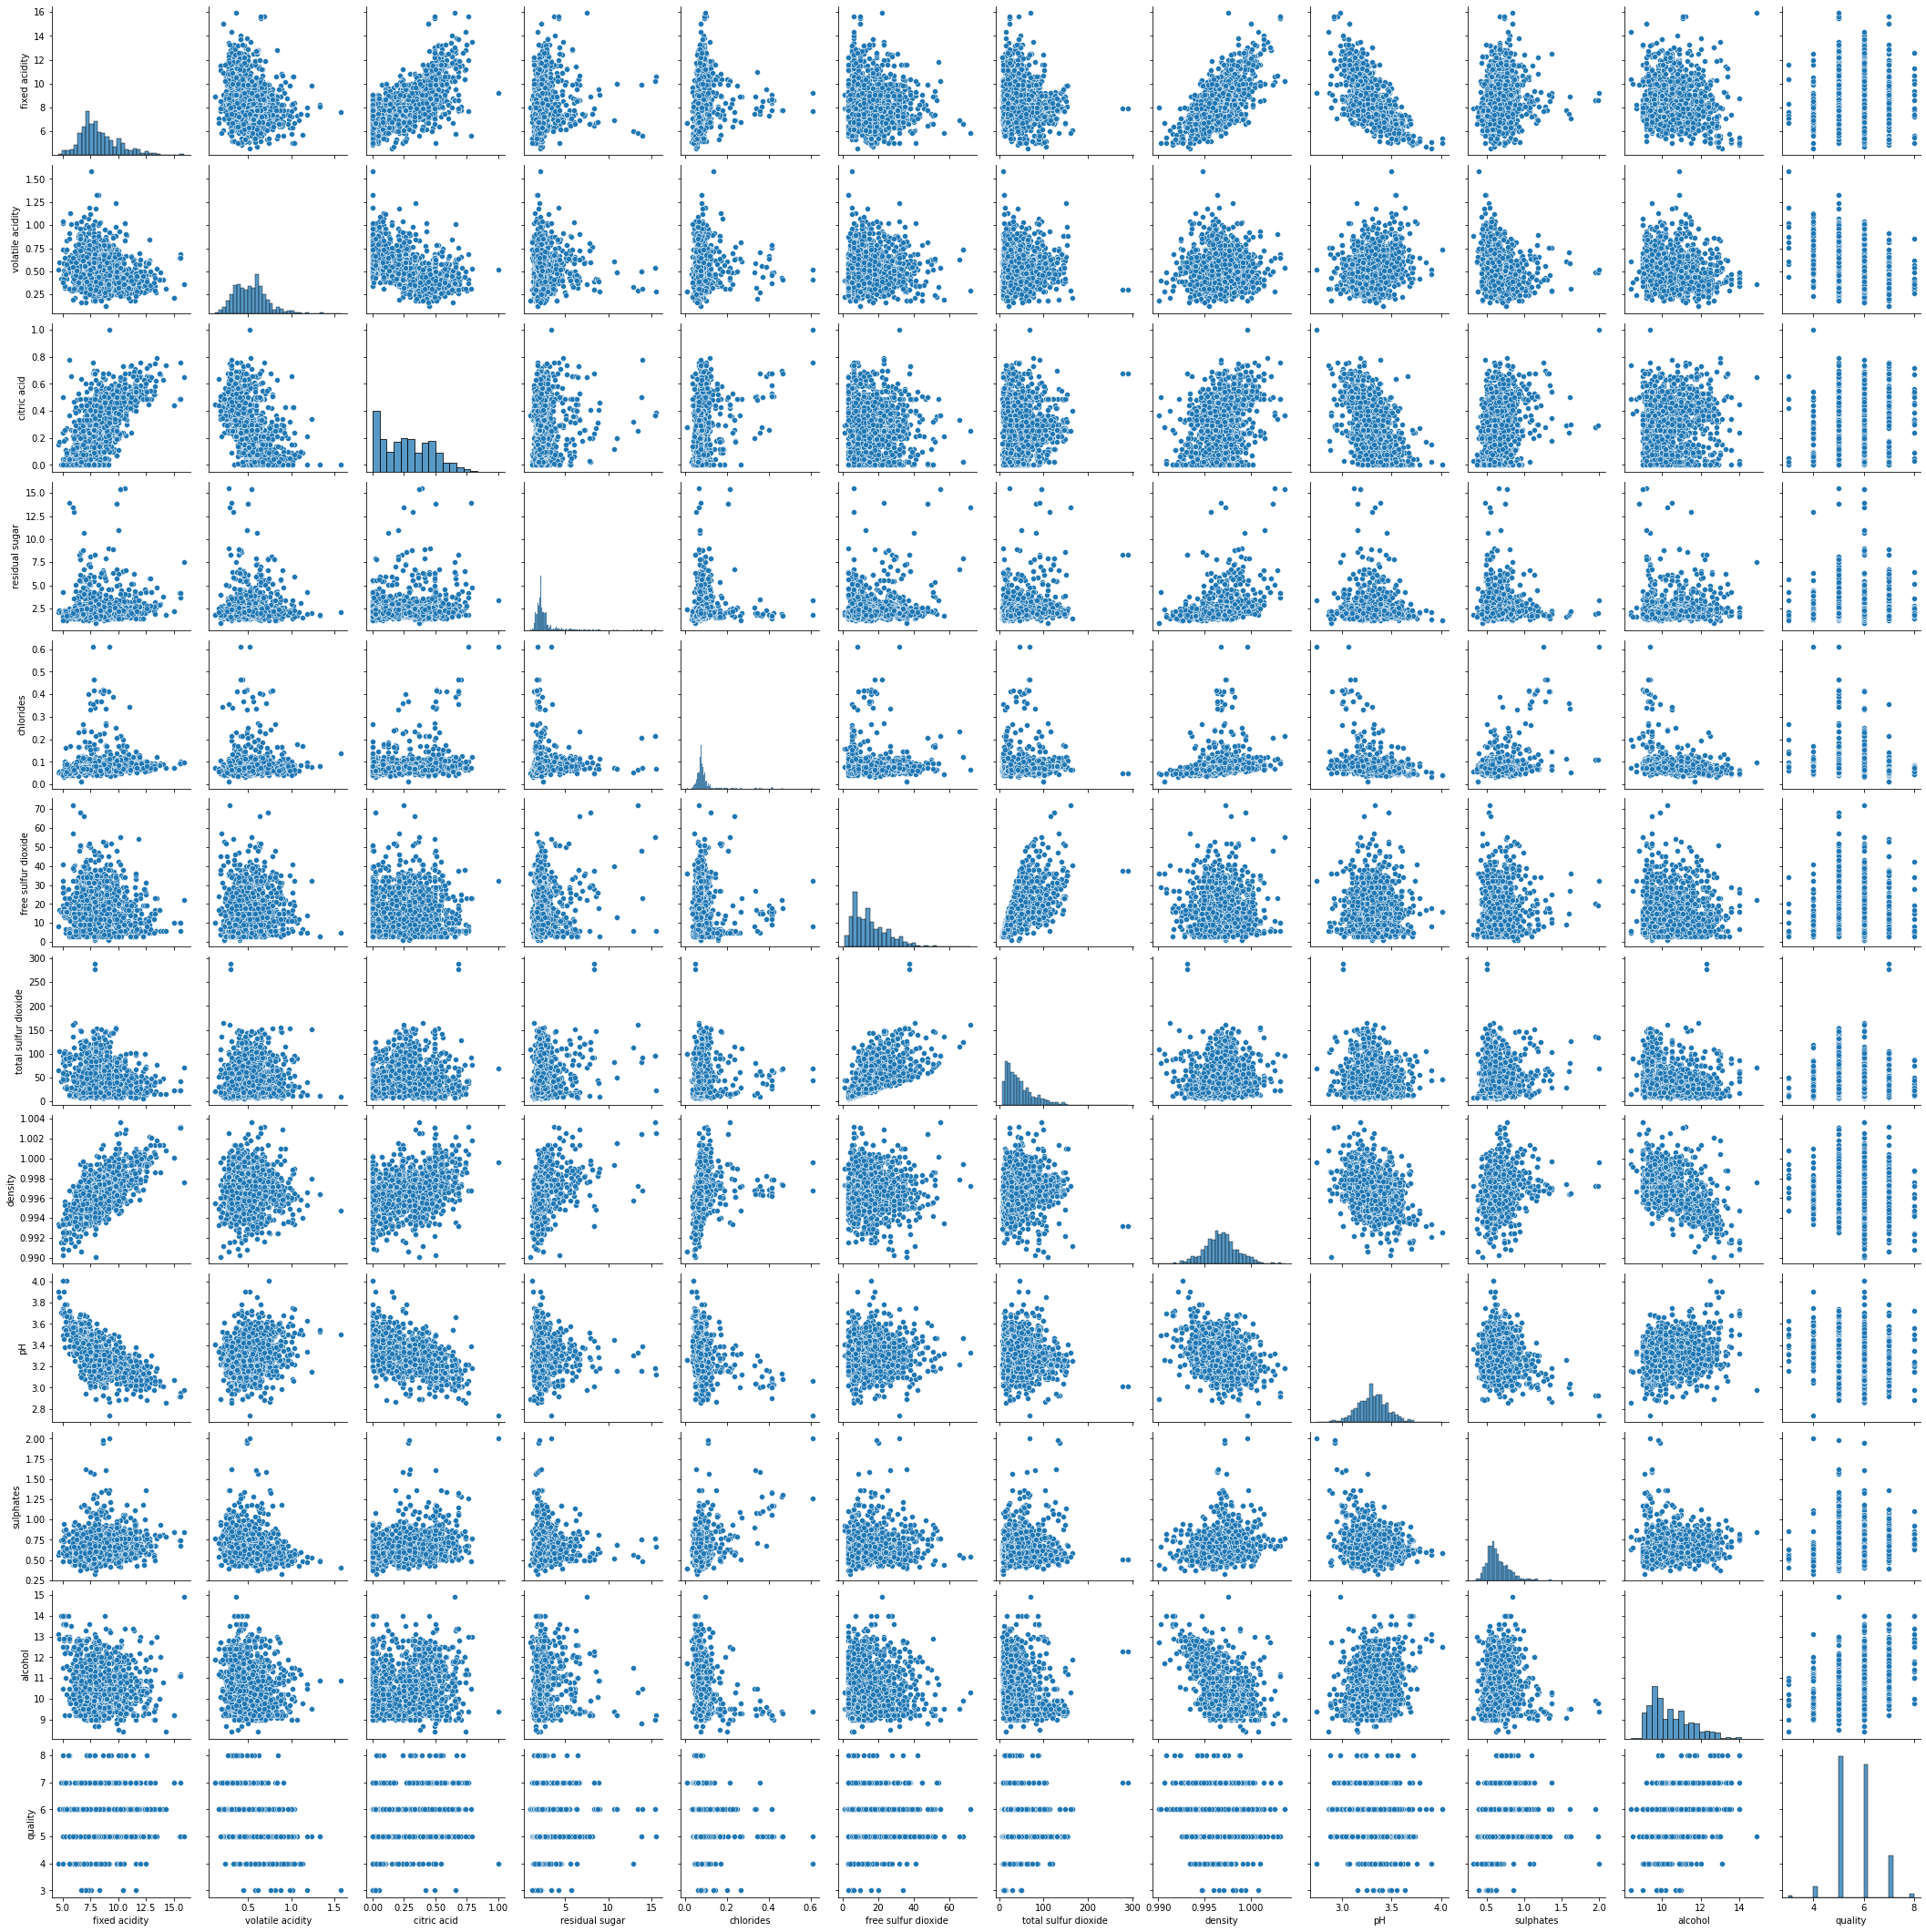

In [ ]:
sns.pairplot(wine)

# Data Preprocessing

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Finding Co-relation between data features attributes


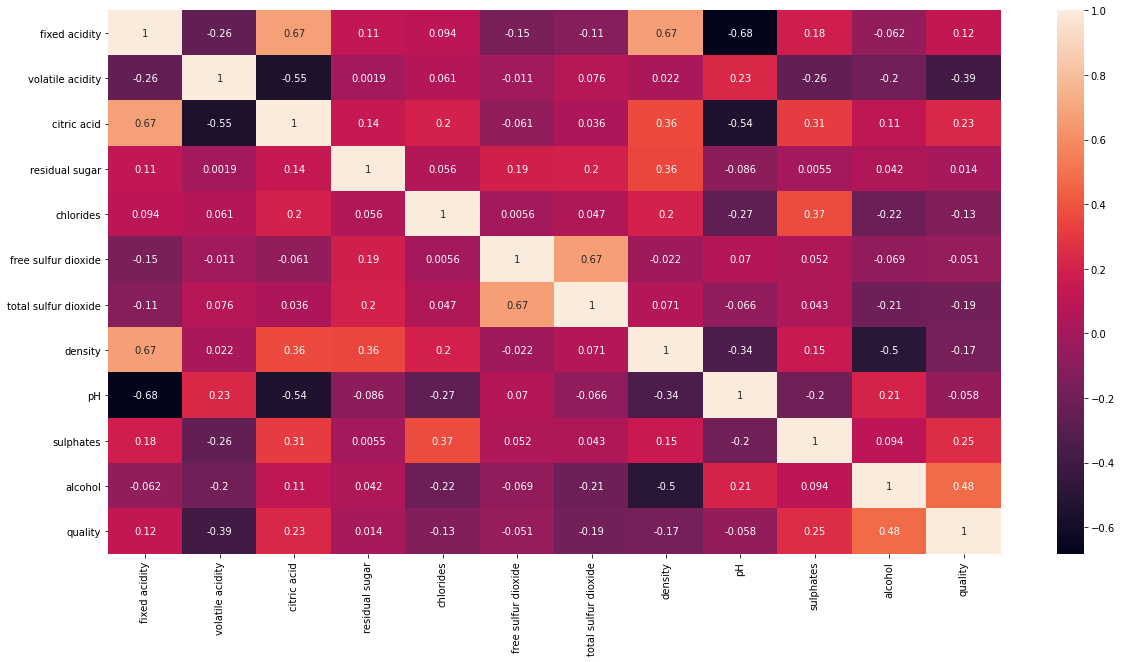

In [6]:
plt.figure(figsize = (20,10))
sns.heatmap(wine.corr(), annot = True)

PODEMOS OBSERVAR COMO HAY VARIABLES QUE DAN UN 0.67 ES DECIR UN APROX DE 0.7


- Por ejemplo las variables mas corr

Gracias al analisis de correlacion de todas las columnas del dataset puedo determinar que las variables de 'citric acid', 'fixed acidity', 'density', 'free sulfur dioxide', 'total sulfur dioxide' mostrara un comportamiento mas  ya que sus valores se aproximan a 1
y el ph da aprox -1

In [7]:
 # Previamente al análisis de Regresión Lineal, conviene analizar la Correlación
# entre dos variables.
pearson_corr = wine.corr(method='pearson').round(2)
pearson_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


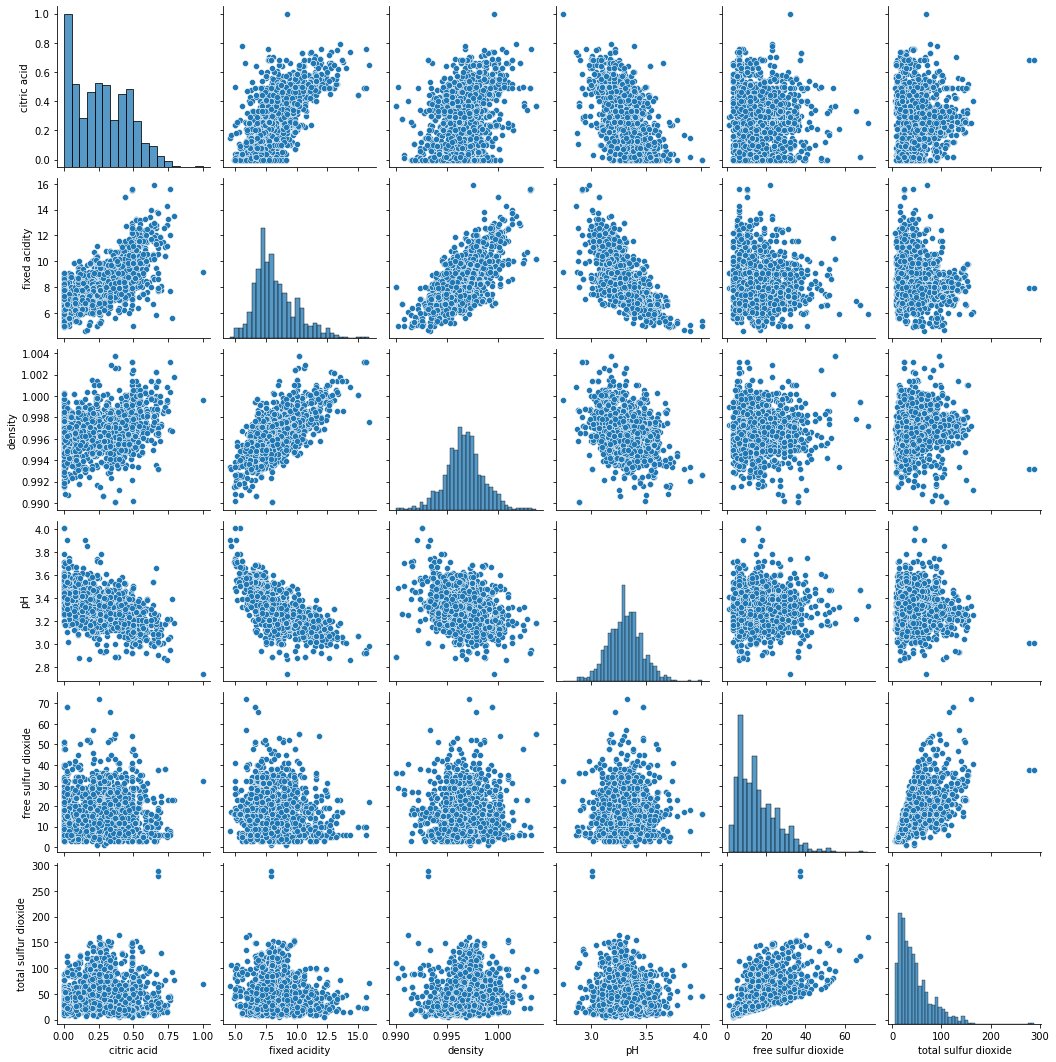

In [8]:
# Gráficos de Histograma y Dispersión
# Los Histogramas muestran la información con respecto a una misma variable.
# Los gráficos de Dispersión muestran la relación entre dos variables.
sns.pairplot(data=wine,
                  y_vars=['citric acid', 'fixed acidity', 'density', 'pH','free sulfur dioxide','total sulfur dioxide'],
                  x_vars=['citric acid', 'fixed acidity', 'density', 'pH','free sulfur dioxide','total sulfur dioxide'])

Text(0.5, 1.0, 'Histograma de Total  sulfur dioxide')

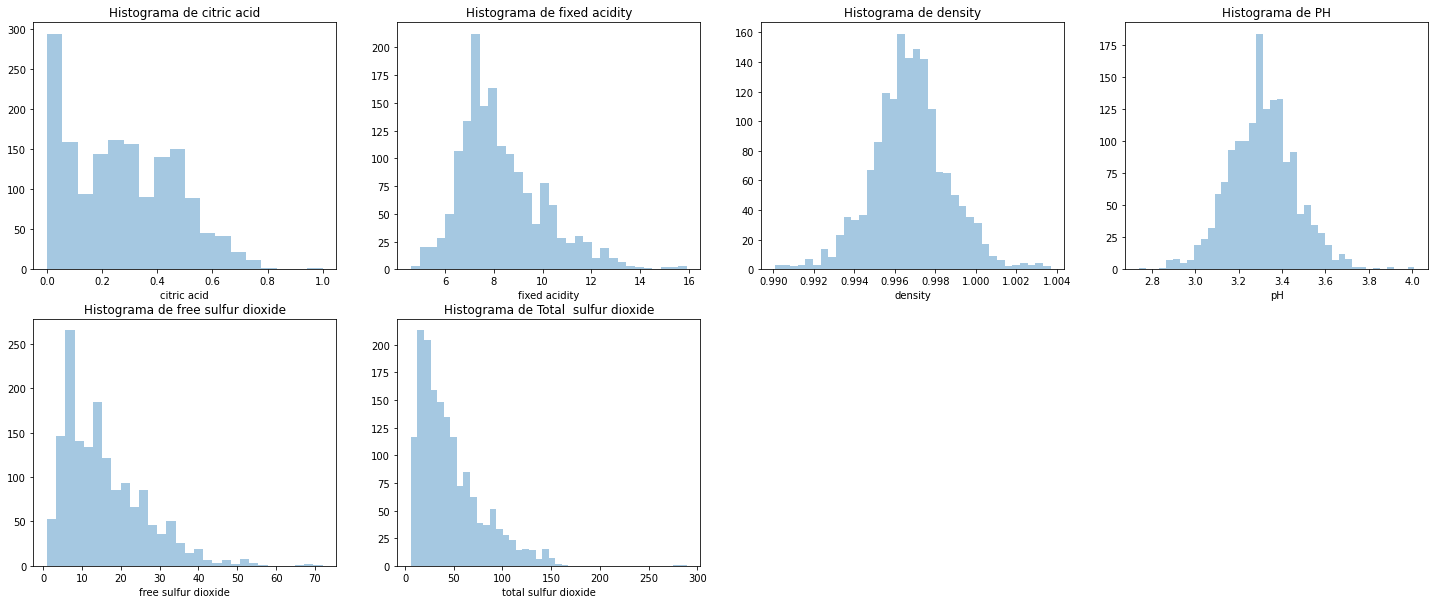

In [9]:
plt.figure(figsize=(25,10))
# ['citric acid', 'fixed acidity', 'density', 'pH']

plt.subplot(241)
sns.distplot(wine['citric acid'], kde = False).set_title("Histograma de citric acid")

plt.subplot(242)
sns.distplot(wine['fixed acidity'], kde = False).set_title("Histograma de fixed acidity")

plt.subplot(243)
sns.distplot(wine['density'], kde = False).set_title("Histograma de density")

plt.subplot(244)
sns.distplot(wine['pH'], kde = False).set_title("Histograma de PH")

plt.subplot(245)
sns.distplot(wine['free sulfur dioxide'], kde = False).set_title("Histograma de free sulfur dioxide")

plt.subplot(246)
sns.distplot(wine['total sulfur dioxide'], kde = False).set_title("Histograma de Total  sulfur dioxide")

# **Regresion Lineal**

## citric acid - fixed acidity

### Calculo

In [ ]:
X = wine['citric acid']
y = wine['fixed acidity']

In [ ]:
# Se reacomodan los valores para usar el modelo LinearRegression()
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [ ]:
 # A continuación se indica que el 40% de los datos serán datos de prueba 
# y el resto permanece en el conjunto de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#Modelo de Regresión Lineal
regresion_lineal = LinearRegression()

In [ ]:
#Se entrena al algoritmo
regresion_lineal.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Pendiente:', regresion_lineal.coef_)
print('Término independiente :',regresion_lineal.intercept_)

Pendiente: [[6.00613927]]
Término independiente : [6.67786814]


In [ ]:
# Una vez obtenida el modelo, se lo prueba con los valores de testeo
y_pred = regresion_lineal.predict(X_test)

### Graficos

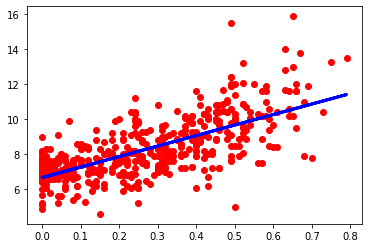

In [ ]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

In [ ]:
# Model evaluation by MAE, MSE and RMSE
# print MAE
print("Test set evaluation")
mae_fixed_citric = metrics.mean_absolute_error(y_test, y_pred)
print('MAE (Mean Absolute Error): %.2f' % mae_fixed_citric)

# print MSE
mse_fixed_citric = metrics.mean_squared_error(y_test, y_pred)
print('MSE (Mean Square Error): %.2f' % mse_fixed_citric)

# print RMSE
#result of RMSE = how far the prediction from reality
rmse_fixed_citric = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Root Mean Square Error): %.2f' % rmse_fixed_citric)
# R2 score
r2_fixed_citric= metrics.r2_score(y_test, y_pred)
print('R2 (Coeficiente de determinación) : %.2f' % r2_fixed_citric)

Test set evaluation
MAE (Mean Absolute Error): 0.94
MSE (Mean Square Error): 1.51
RMSE (Root Mean Square Error): 1.23
R2 (Coeficiente de determinación) : 0.48


## density - fixed acidity

### Calculo

In [ ]:
X = wine['density']
y = wine['fixed acidity']

In [ ]:
# Se reacomodan los valores para usar el modelo LinearRegression()
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [ ]:
 # A continuación se indica que el 40% de los datos serán datos de prueba 
# y el resto permanece en el conjunto de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#Modelo de Regresión Lineal
regresion_lineal = LinearRegression()

In [ ]:
#Se entrena al algoritmo
regresion_lineal.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Pendiente:', regresion_lineal.coef_)
print('Término independiente :',regresion_lineal.intercept_)

Pendiente: [[636.83060349]]
Término independiente : [-626.48859497]


In [ ]:
# Una vez obtenida el modelo, se lo prueba con los valores de testeo
y_pred = regresion_lineal.predict(X_test)

### Graficos

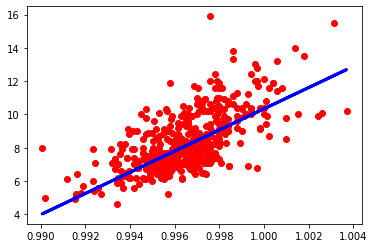

In [ ]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

In [ ]:
# Model evaluation by MAE, MSE and RMSE
# print MAE
print("Test set evaluation")
mae_fixed_density = metrics.mean_absolute_error(y_test, y_pred)
print('MAE (Mean Absolute Error): %.2f' % mae_fixed_density)

# print MSE
mse_fixed_density = metrics.mean_squared_error(y_test, y_pred)
print('MSE (Mean Square Error): %.2f' % mse_fixed_density)

# print RMSE
#result of RMSE = how far the prediction from reality
rmse_fixed_density = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Root Mean Square Error): %.2f' % rmse_fixed_density)

# R2 score
r2_fixed_density= metrics.r2_score(y_test, y_pred)
print('R2 (Coeficiente de determinación) : %.2f' % r2_fixed_density)

Test set evaluation
MAE (Mean Absolute Error): 1.00
MSE (Mean Square Error): 1.73
RMSE (Root Mean Square Error): 1.32
R2 (Coeficiente de determinación) : 0.40


## pH - fixed acidity

### Calculo

In [ ]:
X = wine['pH']
y = wine['fixed acidity']

In [ ]:
# Se reacomodan los valores para usar el modelo LinearRegression()
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [ ]:
 # A continuación se indica que el 40% de los datos serán datos de prueba 
# y el resto permanece en el conjunto de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#Modelo de Regresión Lineal
regresion_lineal = LinearRegression()

In [ ]:
#Se entrena al algoritmo
regresion_lineal.fit(X_train,y_train)
linear_model_pred = regresion_lineal.predict(X_test).round(0)

In [ ]:
print('Pendiente:', regresion_lineal.coef_)
print('Término independiente :',regresion_lineal.intercept_)

Pendiente: [[-7.72375284]]
Término independiente : [33.91255379]


In [ ]:
# Una vez obtenida el modelo, se lo prueba con los valores de testeo
y_pred = regresion_lineal.predict(X_test)
regresion_lineal.score(X_test, y_test)

0.45407237550987123

### Graficos

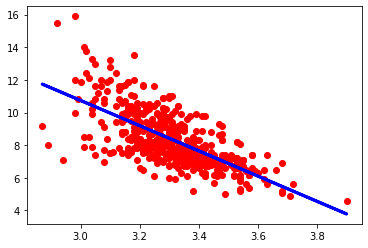

In [ ]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

In [ ]:
# Model evaluation by MAE, MSE and RMSE
# print MAE
print("Test set evaluation")
mae_fixed_pH = metrics.mean_absolute_error(y_test, y_pred)
print('MAE (Mean Absolute Error) :  %.2f' % mae_fixed_pH)

# print MSE
mse_fixed_pH = metrics.mean_squared_error(y_test, y_pred)
print('MSE (Mean Square Error) : %.2f' % mse_fixed_pH)

# print RMSE
#result of RMSE = how far the prediction from reality
rmse_fixed_pH = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE  (Root Mean Square Error) :  %.2f' % rmse_fixed_pH)


# R2 score
r2_fixed_pH= metrics.r2_score(y_test, y_pred)
print('R2 (Coeficiente de determinación) : %.2f' % r2_fixed_pH)

Test set evaluation
MAE (Mean Absolute Error) :  0.99
MSE (Mean Square Error) : 1.58
RMSE  (Root Mean Square Error) :  1.26
R2 (Coeficiente de determinación) : 0.45


## Free sulfur dioxide - Total sulfur dioxide

### Calculo

 Podemos hacer una Regresión Lineal entre los datos del co y humidity 

In [ ]:
X = wine['free sulfur dioxide']
y = wine['total sulfur dioxide']

In [ ]:
# Se reacomodan los valores para usar el modelo LinearRegression()
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [ ]:
 # A continuación se indica que el 40% de los datos serán datos de prueba 
# y el resto permanece en el conjunto de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#Modelo de Regresión Lineal
regresion_lineal = LinearRegression()

In [ ]:
#Se entrena al algoritmo
regresion_lineal.fit(X_train,y_train)
linear_model_pred = regresion_lineal.predict(X_test).round(0)

In [ ]:
print('Pendiente:', regresion_lineal.coef_)
print('Término independiente :',regresion_lineal.intercept_)

Pendiente: [[2.05841856]]
Término independiente : [14.01770443]


In [ ]:
# Una vez obtenida el modelo, se lo prueba con los valores de testeo
y_pred = regresion_lineal.predict(X_test)
regresion_lineal.score(X_test, y_test)

0.4606280614182232

### Graficos

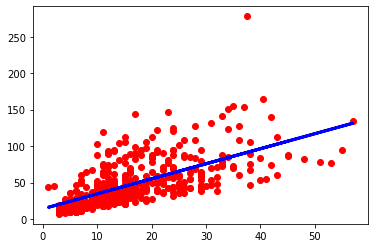

In [ ]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

In [ ]:
# Model evaluation by MAE, MSE and RMSE
# print MAE
print("Test set evaluation")
mae_free_total_sulfur_dioxide = metrics.mean_absolute_error(y_test, y_pred)
print('MAE (Mean Absolute Error) :  %.2f' % mae_free_total_sulfur_dioxide)

# print MSE
mse_free_total_sulfur_dioxide = metrics.mean_squared_error(y_test, y_pred)
print('MSE (Mean Square Error) : %.2f' % mse_free_total_sulfur_dioxide)

# print RMSE
#result of RMSE = how far the prediction from reality
rmse_free_total_sulfur_dioxide = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Root Mean Square Error) :  1%.2f' % rmse_free_total_sulfur_dioxide)


# R2 score
r2_free_total_sulfur_dioxide= metrics.r2_score(y_test, y_pred)
print('R2 (Coeficiente de determinación) : %.2f' % r2_free_total_sulfur_dioxide)

Test set evaluation
MAE (Mean Absolute Error) :  17.41
MSE (Mean Square Error) : 578.57
RMSE (Root Mean Square Error) :  124.05
R2 (Coeficiente de determinación) : 0.46


## Resumen

### *citric acid - fixed acidity*
- MAE (Mean Absolute Error): 0.94
- MSE (Mean Square Error): 1.51
- RMSE (Root Mean Square Error): 1.23
- R2 (Coeficiente de determinación) : 0.48

    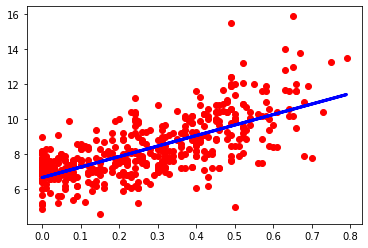


### *density - fixed acidity*
- MAE (Mean Absolute Error): 1.00
- MSE (Mean Square Error): 1.73
- RMSE (Root Mean Square Error): 1.32
- R2 (Coeficiente de determinación) : 0.40

     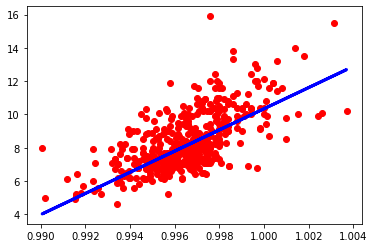

### *pH - fixed acidity*
- MAE (Mean Absolute Error) :  0.99
- MSE (Mean Square Error) : 1.58
- RMSE  (Root Mean Square Error) :  1.26
- R2 (Coeficiente de determinación) : 0.45

    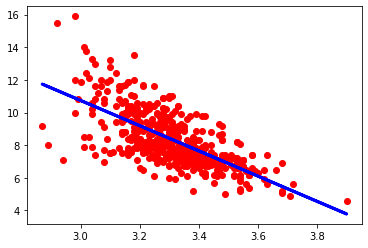
### *Free sulfur dioxide - Total sulfur dioxide*
- MAE (Mean Absolute Error) :  17.41
- MSE (Mean Square Error) : 578.57
- RMSE (Root Mean Square Error) :  124.05
- R2 (Coeficiente de determinación) : 0.46

    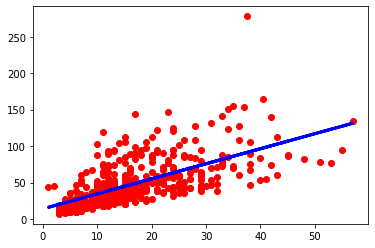

# Definir etiquetas de Bueno o malo





In [88]:
def convert_quali (quality):
    if quality <= 5:
        return 0
    else:
        return 1

Bueno = 1
Malo = 0

In [89]:
wine["quality_bin"] = wine["quality"].apply(convert_quali)

In [90]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [91]:
features = wine.columns[:-2]
output = wine.columns[-1]
print("Features: \n{}, \n\nLabels: \n{}".format(features.values,output))

Features: 
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'], 

Labels: 
quality_bin


## Data Splitting

In [92]:
X = wine[features].values
y = wine[output].values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 12309, Testing size: 5280


In [94]:
X = wine.drop(["quality" ,"quality_bin"] , axis=1)
y = wine['quality_bin']


In [95]:
wine['quality_bin'].value_counts()

1    855
0    744
Name: quality_bin, dtype: int64

# Functions for Analysing Results

## Plot_history en la Red Neuronal


In [51]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Probability Output

In [52]:
def get_probabilty_output(X_test, model_fitted, value_count=10):
    def highlight_max(data, color='yellow'):
        attr = 'background-color: {}'.format(color)
        if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
            is_max = data == data.max()
            return [attr if v else '' for v in is_max]
        else:  # from .apply(axis=None)
            is_max = data == data.max().max()
            return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
        
    y_scores = model_fitted.predict_proba(X_test)
    prob_df = pd.DataFrame(y_scores*100).head(value_count)
    styled_df = prob_df.style.background_gradient(cmap='Reds')
    styled_df = styled_df.highlight_max(axis=1, color='green')
    return styled_df

## Classification Report

In [104]:
def get_classification_report(y_test,predictions,average="macro"):
    #Confusion Matrix}
   
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True)
    plt.title("Confusion Matrix")
    
    acc = accuracy_score(y_test, predictions)
    pre = precision_score(y_test, predictions, average=average)
    rec = recall_score(y_test, predictions, average=average)
    # Prediction Report
    print(classification_report(y_test, predictions, digits=3))
    print("Overall Accuracy:", acc)
    print("Overall Precision:", pre)
    print("Overall Recall:", rec)
    
    return acc,pre,rec
    

## Classification ROC

In [75]:
def get_classification_ROC(X,y,model,test_size,model_fitted=False,random_state=0):
    
    def check_fitted(clf): 
        return hasattr(clf, "classes_")
    
    if(len(np.unique(y)) == 2):
        #Binary Classifier
        if not check_fitted(model):
            model = model.fit(X,y)
        
        plot_roc_curve(model, X, y)
        y_score = model.predict_proba(X)[:, 1]
        fpr, tpr, threshold = roc_curve(y, y_score)
        auc = roc_auc_score(y, y_score)
        return auc
#         print("False Positive Rate: {} \nTrue Positive Rate: {} \nThreshold:{}".format(fpr,tpr,threshold))
    
    else:
        #Multiclass Classifier
        y_bin = label_binarize(y, classes=np.unique(y))
        n_classes = y_bin.shape[1]

        # shuffle and split training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=test_size, random_state=random_state)

        # Learn to predict each class against the other
        classifier = OneVsRestClassifier(model)
        model_fitted = classifier.fit(X_train, y_train)
        try:
            y_score = model_fitted.decision_function(X_test)
        except:
            y_score = model_fitted.predict_proba(X_test)



        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


        plt.figure()
        lw = 2
        plt.plot(fpr[2], tpr[2], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic averaged')
        plt.legend(loc="lower right")
        plt.show()



        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(10,10))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue', 'purple', 'green'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('multi-class ROC (One vs All)')
        plt.legend(loc="lower right")
        plt.show()

# **Naive Bayes Classifier**

              precision    recall  f1-score   support

           0       0.65      0.45      0.53       228
           1       0.61      0.78      0.69       252

    accuracy                           0.62       480
   macro avg       0.63      0.61      0.61       480
weighted avg       0.63      0.62      0.61       480

Accuracy: 0.62


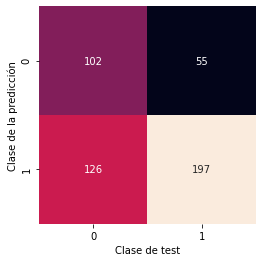

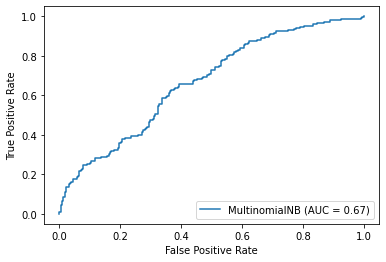

In [25]:
# MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
# crear matriz de confusión
matrixMultinomialNB = confusion_matrix(y_test, y_pred) 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(y_pred,y_test))

sns.heatmap(matrixMultinomialNB.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');
auc_NB = get_classification_ROC(X_test,y_test,classifier,test_size=0.3,random_state=0)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.53      1.00      0.69       252

    accuracy                           0.53       480
   macro avg       0.26      0.50      0.34       480
weighted avg       0.28      0.53      0.36       480

Accuracy: 0.53


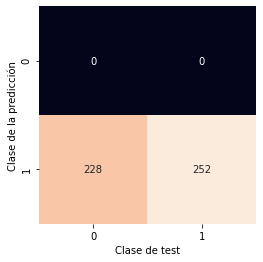

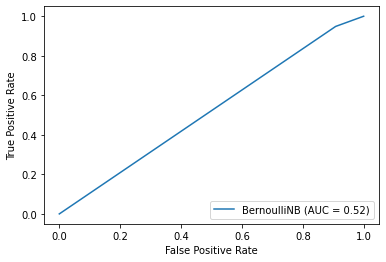

In [26]:
# Bernoulli Naive Bayes

classifier = BernoulliNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
matrixBernoulliNB = confusion_matrix(y_test, y_pred)

sns.heatmap(matrixBernoulliNB.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(y_pred,y_test))
auc_NB = get_classification_ROC(X_test,y_test,classifier,test_size=0.3,random_state=0)

              precision    recall  f1-score   support

           0       0.65      0.46      0.54       228
           1       0.61      0.78      0.69       252

    accuracy                           0.63       480
   macro avg       0.63      0.62      0.61       480
weighted avg       0.63      0.63      0.62       480

Accuracy: 0.63


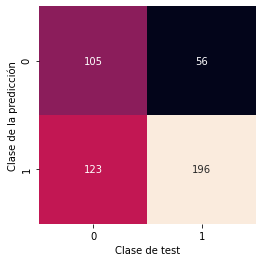

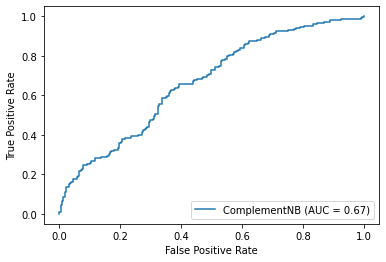

In [27]:
# Complement Naive Bayes

classifier = ComplementNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
matrixComplementNB = confusion_matrix(y_test, y_pred)

sns.heatmap(matrixComplementNB.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(y_pred,y_test))
auc_NB = get_classification_ROC(X_test,y_test,classifier,test_size=0.3,random_state=0)

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       228
           1       0.74      0.72      0.73       252

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480

Accuracy: 0.72


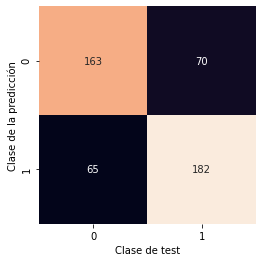

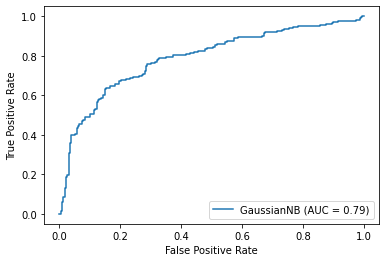

In [28]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
matrixGaussianNB = confusion_matrix(y_test, y_pred)

sns.heatmap(matrixGaussianNB.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(y_pred,y_test))

auc_NB = get_classification_ROC(X_test,y_test,classifier,test_size=0.3,random_state=0)

GaussianNB
****Results****
Accuracy: 71.8750%
MultinomialNB
****Results****
Accuracy: 62.2917%
BernoulliNB
****Results****
Accuracy: 52.5000%
ComplementNB
****Results****
Accuracy: 62.7083%


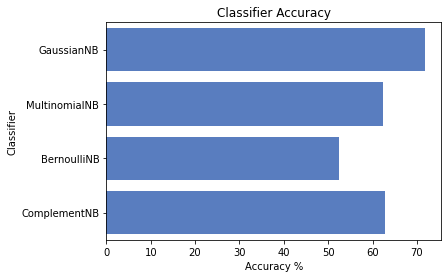

In [29]:
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()



# **Decision tree**


In [30]:
#En "x" guardamos el resto. Con la función drop, eliminamos a "malware"
feature_cols = wine.columns.drop(["quality" ,"quality_bin"])


In [31]:
X = wine[feature_cols] # Features
y = wine['quality_bin'] # Target variable

In [32]:
#  Dividimos al conjunto de datos en entrenamiento y testeot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

##  Construimos el clasificador

In [33]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier()

#Optimization Decision Tree
modelDecision = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
modelDecision = modelDecision.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = modelDecision.predict(X_test)

##  Métricas

In [34]:
 print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7166666666666667


In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.2833333333333333


In [36]:
parameters_DT = {
    'criterion':('gini','entropy'),
    'max_features': ('auto','sqrt','log2')
}
model_DT = DecisionTreeClassifier()
model_DT_with_best_params = GridSearchCV(model_DT, parameters_DT)
model_DT_with_best_params.fit(X_train,y_train)
model_DT_best_params = model_DT_with_best_params.best_params_


In [37]:
get_probabilty_output(X_test=X_test, model_fitted=model_DT_with_best_params)

,0,1
0,0.000000,100.000000
1,100.000000,0.000000
2,0.000000,100.000000
3,0.000000,100.000000
4,100.000000,0.000000
5,100.000000,0.000000
6,100.000000,0.000000
7,0.000000,100.000000
8,100.000000,0.000000
9,100.000000,0.000000


              precision    recall  f1-score   support

           0       0.70      0.69      0.70       226
           1       0.73      0.74      0.73       254

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480

Accuracy: 0.72


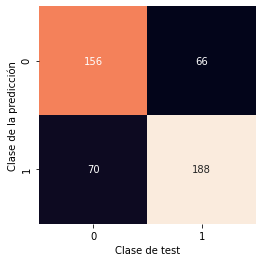

In [38]:
matrixDecision = confusion_matrix(y_test, y_pred) 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(y_pred,y_test))

sns.heatmap(matrixDecision.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');

##  Visualizando el árbol

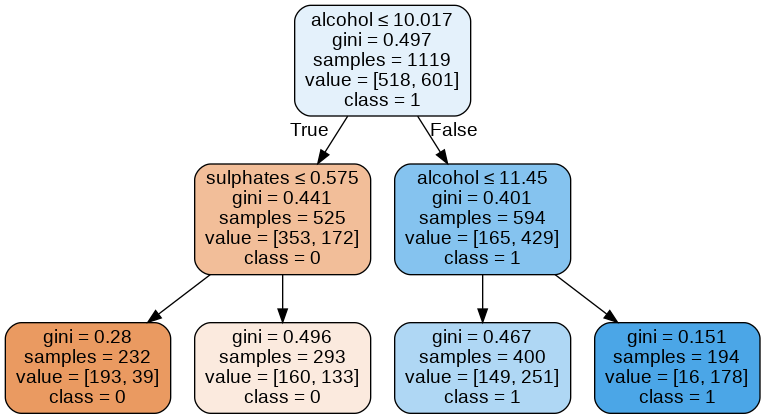

In [40]:
dot_data = StringIO()

export_graphviz(modelDecision, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Wine.png')
Image(graph.create_png())

RESUMEN
- Accuracy: 0.7166666666666667 
- Mean Absolute Error: 0.2833333333333333 

# **Red neuronal**

In [105]:
X = wine.drop(["quality" ,"quality_bin"] , axis=1)
y = wine['quality_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [106]:
modelRNA =  keras.Sequential([
     layers.Dense(64, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dropout(0.3),
     layers.Dense(1, activation='sigmoid')
])

In [107]:
modelRNA.compile(
optimizer ="adam",
loss = "binary_crossentropy",
metrics=['accuracy']   
)


In [108]:
history = modelRNA.fit(X_train,y_train, validation_data = (X_test,y_test), batch_size = 10, epochs = 1000)

Epoch 1/1000
112/112 [==============================] - 1s 3ms/step - loss: 0.7952 - accuracy: 0.5559 - val_loss: 0.6517 - val_accuracy: 0.6062
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6238 - val_loss: 0.6426 - val_accuracy: 0.6250
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6148 - val_loss: 0.6615 - val_accuracy: 0.6125
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.6193 - val_loss: 0.6476 - val_accuracy: 0.6229
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6363 - val_loss: 0.6410 - val_accuracy: 0.6292
Epoch 6/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6533 - val_loss: 0.6401 - val_accuracy: 0.6250
Epoch 7/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6297 - accuracy: 0.6408 - val_loss: 0.6492 - val_accuracy:

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       744
           1       0.89      0.80      0.84       855

    accuracy                           0.84      1599
   macro avg       0.84      0.84      0.84      1599
weighted avg       0.84      0.84      0.84      1599

Accuracy: 0.84


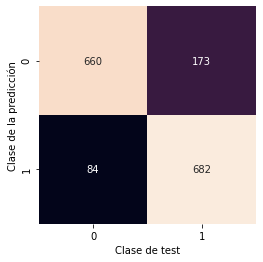

In [114]:
y_pred = modelRNA.predict_classes(X)
# crear matriz de confusión
matrixRedNeuronal= confusion_matrix(y, y_pred) 
# Summary of the predictions made by the classifier
print(classification_report(y, y_pred))
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(y_pred,y))

sns.heatmap(matrixRedNeuronal.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');


In [110]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.795208,0.555853,0.651707,0.606250
1,0.663681,0.623771,0.642566,0.625000
2,0.657748,0.614835,0.661499,0.612500
3,0.652891,0.619303,0.647628,0.622917
4,0.646738,0.636282,0.641035,0.629167
...,...,...,...,...
995,0.198416,0.907954,2.367229,0.731250
996,0.202386,0.899911,2.334858,0.714583
997,0.216788,0.904379,2.549573,0.722917
998,0.204558,0.901698,2.535089,0.704167


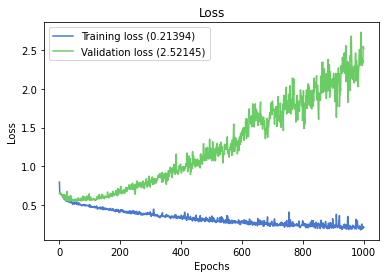

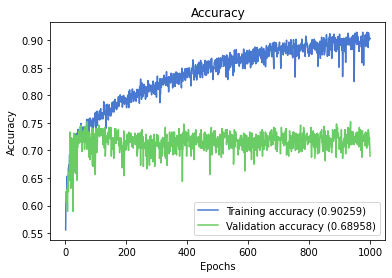

In [111]:
plot_history(history)

In [113]:
loss, accuracy = modelRNA.evaluate(X_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

35/35 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9035
Accuracy: 90.35
Loss: 20.21


# **KNN: k-Nearest Neighbor Classifier**

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 25)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7166666666666667, 0.6604166666666667, 0.6645833333333333, 0.6229166666666667, 0.6395833333333333, 0.6208333333333333, 0.6375, 0.63125, 0.6354166666666666, 0.61875, 0.64375, 0.6270833333333333, 0.6395833333333333, 0.65, 0.65, 0.64375, 0.65625, 0.6604166666666667, 0.6604166666666667, 0.6520833333333333, 0.6479166666666667, 0.64375, 0.65, 0.6583333333333333]


Text(0, 0.5, 'Testing Accuracy')

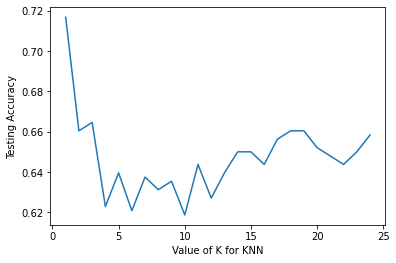

In [ ]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

              precision    recall  f1-score   support

           0       0.67      0.72      0.70       216
           1       0.76      0.72      0.74       264

    accuracy                           0.72       480
   macro avg       0.71      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480

Accuracy: 0.72


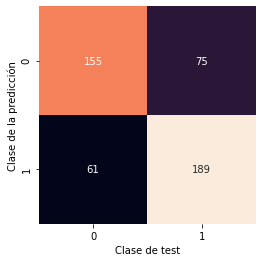

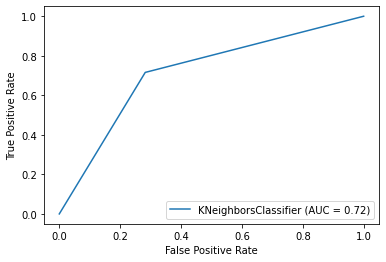

In [ ]:
matrixKNN = confusion_matrix(y_test, y_pred) 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(y_pred,y_test))

sns.heatmap(matrixKNN.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');
auc_KNN = get_classification_ROC(X_test,y_test,knn,test_size=0.3,random_state=0)

In [ ]:
knn = KNN(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % metrics.accuracy_score(y_test, y_pred))
print('Loss: %.2f' % metrics.brier_score_loss(y_test, y_pred))

Accuracy: 0.72
Loss: 0.28


BUSCANDO LA MEJOR METRICA

In [ ]:
parameters_KNN = {
    "n_neighbors" : range(1, 100),
    "weights" : ('uniform','distance'),
    'metric':('euclidean','manhattan','chebyshev','minkowski','seuclidean','mahalanobis'),
    "algorithm" : ('auto','ball_tree','kd_tree','brute'),
    'p': [1,2,5]    
}

model_KNN = KNN()
model_KNN_with_best_params = GridSearchCV(model_KNN, parameters_KNN, scoring="accuracy")
model_KNN_with_best_params.fit(X_train,y_train)
model_KNN_best_params = model_KNN_with_best_params.best_params_

naranja son cuantos ceros accerte cuantos clasifico

pastel es cuantos 1 acerto

negro y violeta son los falsos 

### Predicting 

In [ ]:
model_KNN_best_params

{'algorithm': 'brute',
 'metric': 'seuclidean',
 'n_neighbors': 12,
 'p': 1,
 'weights': 'distance'}

In [ ]:
predictions_KNN = model_KNN_with_best_params.predict(X_test)
print("Predictions:",predictions_KNN[:10])
print("Actual:",y_test[:10])

Predictions: [1 1 0 1 0 1 1 1 1 0]
Actual: [1 1 0 1 0 1 1 0 1 0]


### Result

In [ ]:
get_probabilty_output(X_test=X_test, model_fitted=model_KNN_with_best_params)

,0,1
0,10.036648,89.963352
1,14.070099,85.929901
2,100.000000,0.000000
3,0.000000,100.000000
4,100.000000,0.000000
5,9.277173,90.722827
6,32.601783,67.398217
7,42.107081,57.892919
8,0.000000,100.000000
9,100.000000,0.000000


              precision    recall  f1-score   support

           0       0.75      0.78      0.76       216
           1       0.81      0.79      0.80       264

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480

Accuracy: 0.78


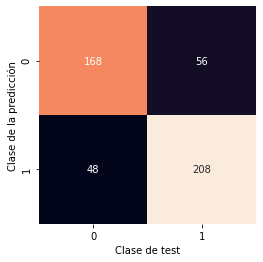

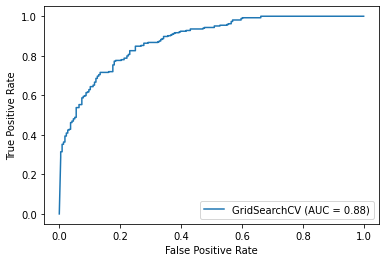

In [ ]:
matrixKNN_with_best_params = confusion_matrix(y_test, predictions_KNN) 
# Summary of the predictions made by the classifier
print(classification_report(y_test, predictions_KNN))
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(predictions_KNN,y_test))

sns.heatmap(matrixKNN_with_best_params.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');
auc_KNN = get_classification_ROC(X_test,y_test,model_KNN_with_best_params,test_size=0.3,random_state=0)

In [ ]:
print('Accuracy: %.2f' % metrics.accuracy_score(y_test, predictions_KNN))
print('Loss: %.2f' % metrics.brier_score_loss(y_test, predictions_KNN))

Accuracy: 0.78
Loss: 0.22
